In [89]:
import numpy as np
import matplotlib.pyplot as plt

class Directed_Sandpile:
    def __init__(self, longitudinal_size, transverse_size):
        self.longitudinal_size = longitudinal_size
        self.transverse_size = transverse_size
        self.grid = np.zeros(longitudinal_size * transverse_size)        
        size = longitudinal_size * transverse_size
        self.toppling_matrix = np.zeros((size, size), dtype=int)
        np.fill_diagonal(self.toppling_matrix, 2)        
        # Set -1 for the downward neighbor (next row in the same column)
        row_indices = np.arange(size - transverse_size)  # Exclude the last row
        downward_indices = row_indices + transverse_size
        self.toppling_matrix[row_indices, downward_indices] = -1
        # Set -1 for the rightward periodic neighbor of the downward neighbor
        rightward_indices = (downward_indices + 1) % self.transverse_size \
                            + (downward_indices // self.transverse_size) * self.transverse_size
        rightward_indices = np.where(
            (downward_indices % self.transverse_size) != (self.transverse_size - 1), 
            downward_indices + 1, 
            downward_indices - (self.transverse_size - 1)
        )
        self.toppling_matrix[row_indices, rightward_indices] = -1

    
    def grid_plotter(self):
        return self.grid.reshape((self.longitudinal_size, self.transverse_size))

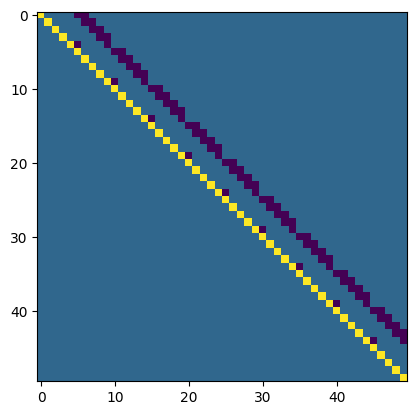

In [92]:
a = Directed_Sandpile(10,5)
plt.imshow(a.toppling_matrix)